In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import hotspot

In [2]:
adata=sc.read('../../data/processed_adata/adata_msbrain_3rep_withclusters_only_nuclei_deep_annotation_with_colors.h5ad')

In [3]:
adata.obsm['spatial']=np.array(adata.obs.loc[:,['x_centroid','y_centroid']])
adata1=adata[adata.obs['replicate']=='1',:]

In [4]:
adata1=sc.AnnData(adata1.X,obs=adata1.obs,var=adata1.var,obsm=adata1.obsm)
adata1.layers['raw']=adata1.X

In [5]:
hs = hotspot.Hotspot(
    adata1,
    layer_key='raw',
    model='bernoulli',
    latent_obsm_key="spatial",
    umi_counts_obs_key="total_counts",
)

/home/sergioms/miniconda3/envs/spatial2022/lib/python3.9/site-packages/hotspot/hotspot.py:98: UserWarning: Hotspot will work faster when counts are a csc sparse matrix.
  warnings.warn(


In [6]:
hs.create_knn_graph(
    weighted_graph=False, n_neighbors=10,
)
hs_results = hs.compute_autocorrelations(jobs=4)

hs_results.head()

100%|████████████████████████████████████████████████████████████████████████████████| 284/284 [00:01<00:00, 183.45it/s]


,C,Z,Pval,FDR
Gene,,,,
Spag16,0.546679,214.506954,0.0,0.0
Neurod6,0.516055,191.725429,0.0,0.0
Slc13a4,0.451219,172.668805,0.0,0.0
Igf2,0.424202,166.392665,0.0,0.0
Slc17a7,0.418152,154.810284,0.0,0.0


In [7]:
hs_genes = hs_results.index[hs_results.FDR < 0.05]

In [8]:
hs_results.to_csv('../../figures/tables/hotspot_msbrain_nuclei_rep1.csv')

In [13]:
hs.create_knn_graph(weighted_graph=False, n_neighbors=20)
hs_results = hs.compute_autocorrelations()
hs_genes = hs_results.loc[hs_results.FDR < 0.005].head(1000).index # Select genes
local_correlations = hs.compute_local_correlations(hs_genes) # jobs for parallelization


KeyboardInterrupt: 

In [ ]:
modules = hs.create_modules(
    min_gene_threshold=20, core_only=True, fdr_threshold=0.05)


In [ ]:
hs.plot_local_correlations(vmax=10,
                           vmin=-10)

In [ ]:
module_scores = hs.calculate_module_scores()

<Figure size 432x288 with 0 Axes>

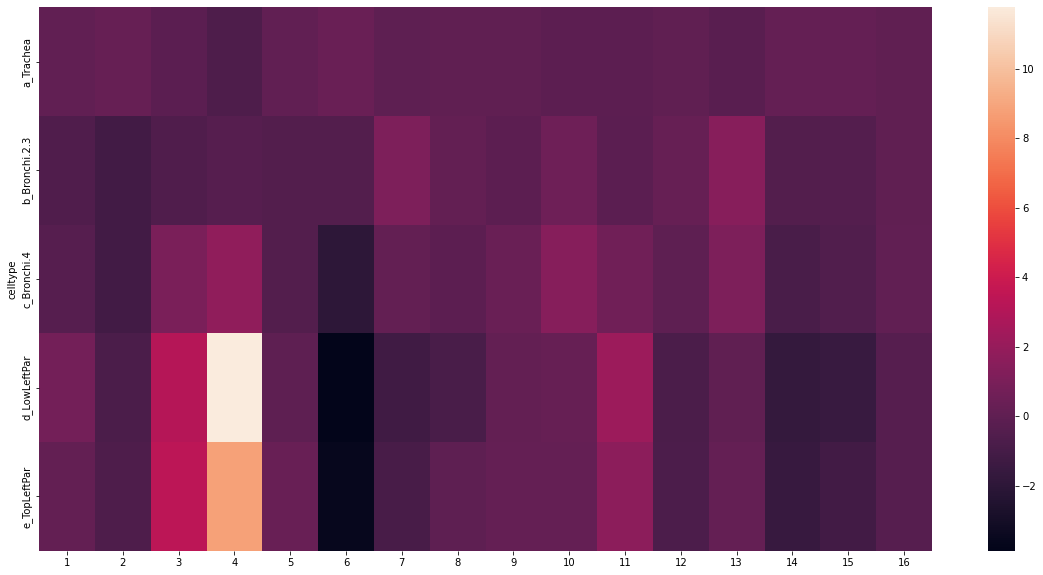

<Figure size 432x288 with 0 Axes>

In [134]:
modules_basal=modules
module_scores['celltype']=list(adatasub.obs['Loc_true'])
mean_module_score=module_scores.groupby('celltype').mean()
plt.figure(figsize=(20,10))
sns.heatmap(mean_module_score)
plt.figure('Basal')

Text(0.5, 1.0, 'goblet')

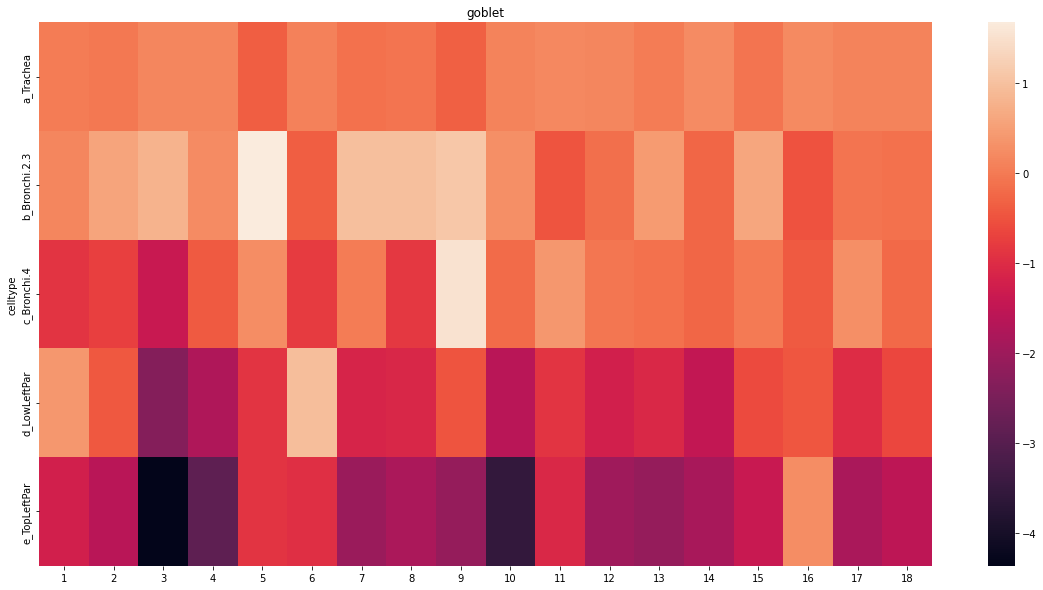

In [142]:
modules_goblet=modules
module_scores['celltype']=list(adatasub.obs['Loc_true'])
mean_module_score=module_scores.groupby('celltype').mean()
plt.figure(figsize=(20,10))
sns.heatmap(mean_module_score)
plt.title('goblet')

In [143]:
mbc=modules_basal[modules_basal.index.isin(modules_goblet.index)]
mgc=modules_goblet[modules_goblet.index.isin(modules_basal.index)]

In [144]:
im1=pd.DataFrame(mgc).sort_index()
im2=pd.DataFrame(mbc).sort_index()

In [145]:
im1['module_basal']=im2['Module']

In [146]:
im1['module_goblet']=im1['Module']

In [147]:
pdtra=pd.crosstab(im1['module_goblet'],im1['module_basal'])

<AxesSubplot:xlabel='module_basal', ylabel='module_goblet'>

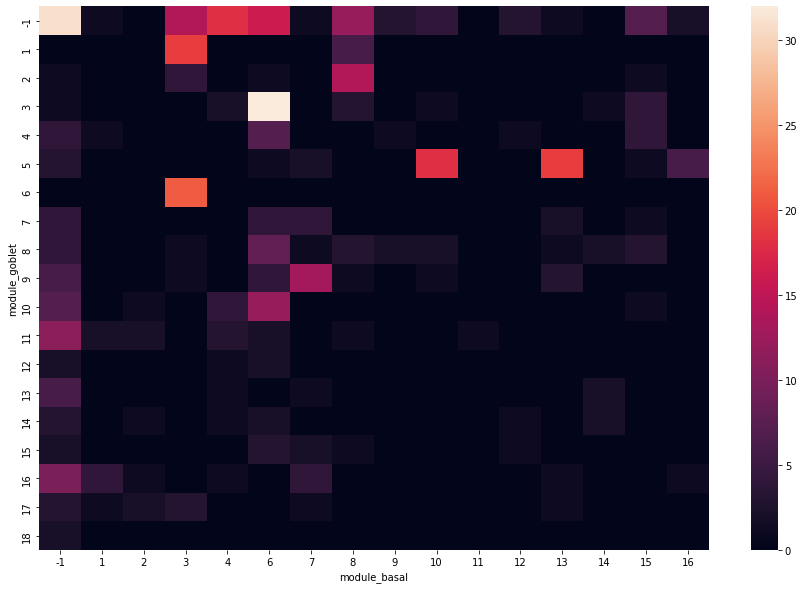

In [148]:
plt.figure(figsize=(15,10))
sns.heatmap(pdtra)

In [158]:
im1[im1['module_goblet']==9]

,Module,module_basal,module_goblet
AHNAK,9,7,9
ALDH1A3,9,-1,9
ANXA1,9,7,9
C19orf33,9,8,9
EDN1,9,13,9
EMP1,9,7,9
EPHA2,9,7,9
EZR,9,7,9
FGFBP1,9,6,9
GPX4,9,3,9


In [157]:
im1[im1['module_goblet']==6]

,Module,module_basal,module_goblet
RPL13A,6,3,6
RPL21,6,3,6
RPL23,6,3,6
RPL23A,6,3,6
RPL26,6,3,6
RPL27,6,3,6
RPL27A,6,3,6
RPL31,6,3,6
RPL35,6,3,6
RPL36,6,3,6


In [156]:
im1[im1['module_goblet']==3]

,Module,module_basal,module_goblet
ALDOA,3,6,3
ALOX15,3,-1,3
ANXA2,3,6,3
ASS1,3,6,3
BCAP31,3,15,3
CD9,3,6,3
CFL1,3,6,3
CLIC1,3,6,3
COX5A,3,6,3
COX6A1,3,6,3


In [23]:
pd.DataFrame(modules[modules==19]).to_csv(r'C:\Users\sergio.salas\Documents\PhD\JNotebooks\DiscovAIR\analysis/modlues_hotspot.csv')

In [58]:
module_scores.to_csv(r'C:\Users\sergio.salas\Documents\PhD\JNotebooks\DiscovAIR\analysis/modlues_hotspot.csv')

In [64]:
for e in module_scores.columns:
    newname='module_'+str(e)
    adatasub.obs[newname]=list(module_scores.loc[:,e])

Trying to set attribute `.obs` of view, copying.


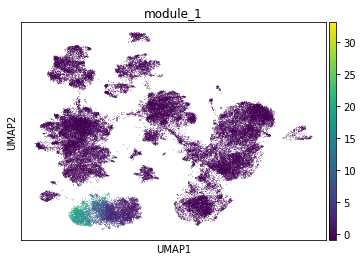

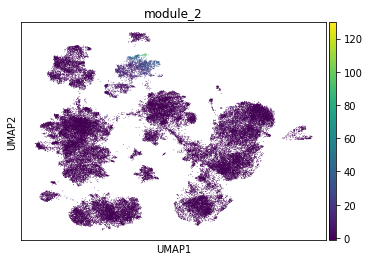

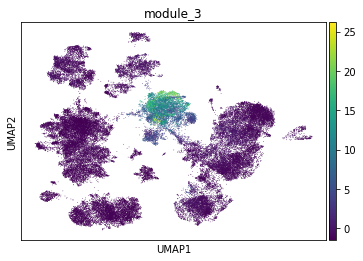

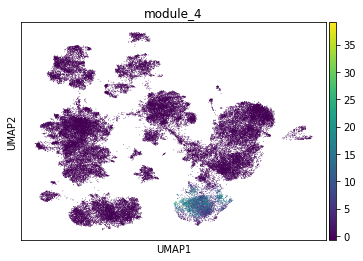

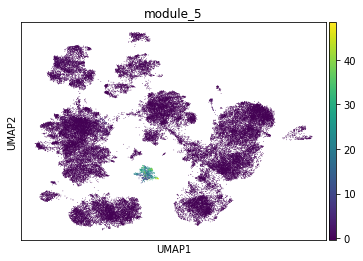

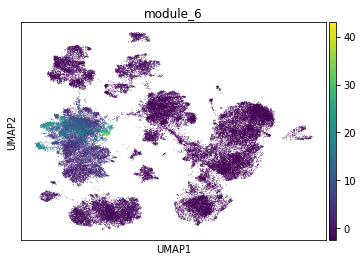

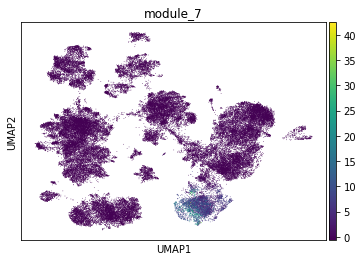

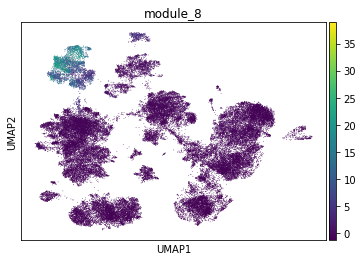

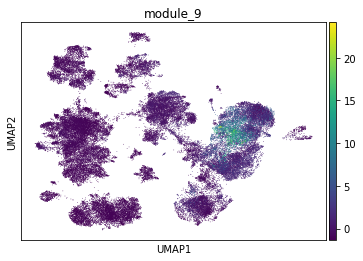

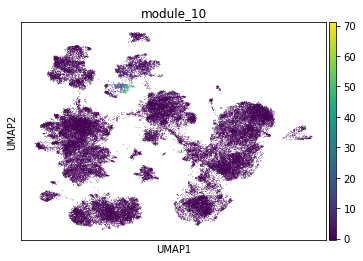

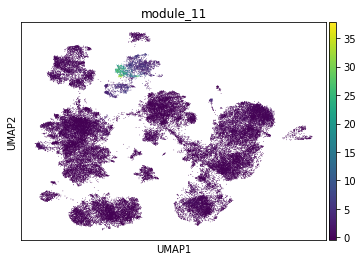

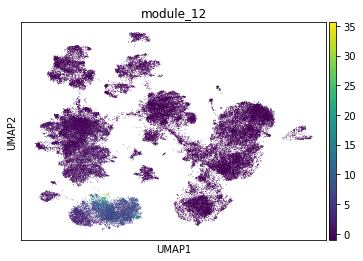

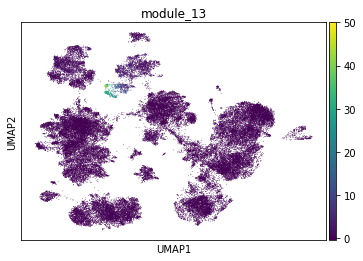

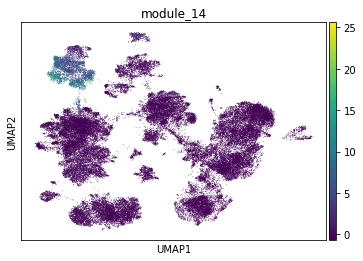

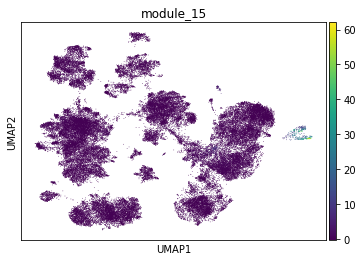

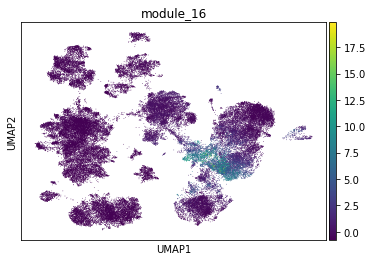

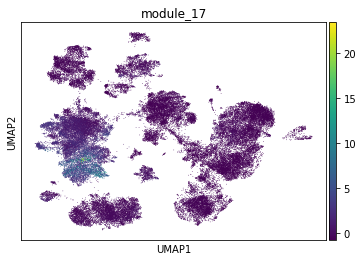

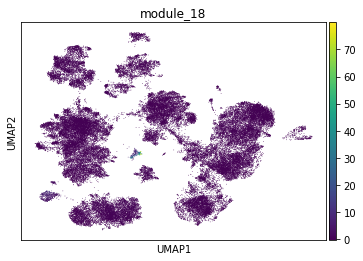

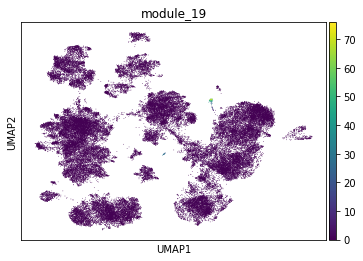

In [68]:
for e in module_scores.columns:
    newname='module_'+str(e)
    sc.pl.umap(adatasub,color=newname)

<AxesSubplot:ylabel='celltype'>

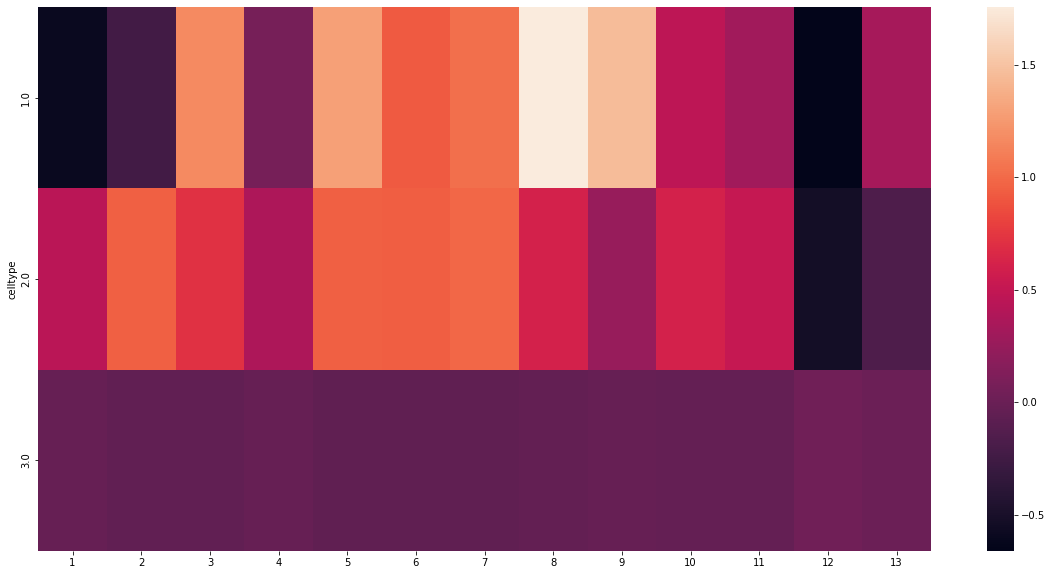